## Krylov Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
λ = 10 + np.arange(N)
A = np.triu(np.random.rand(N,N),1) + np.diag(λ)
b = np.random.rand(N)

In [3]:
m = 50
Km = np.zeros((N, m))

v = b
for i in range(m):
    v = v / np.linalg.norm(v)
    Km[:,i] = v
    v = A @ v

In [4]:
resid = np.zeros(m)
for i in range(m):
    K = Km[:,:i]
    z = np.linalg.lstsq(A @ K, b)[0]
    x = K @ z
    resid[i] = np.linalg.norm(b - A@x)

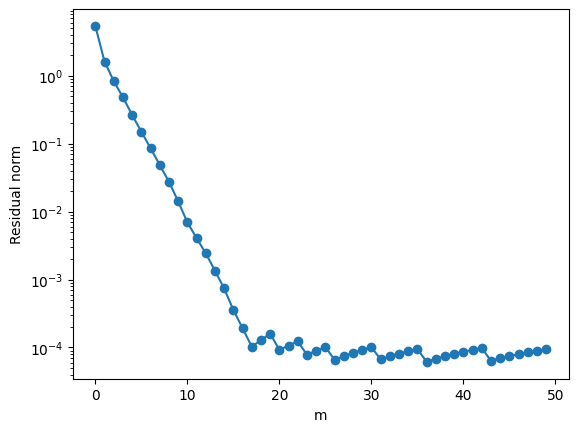

In [5]:
plt.semilogy(np.arange(m), resid, 'o-')
plt.xlabel("m")
plt.ylabel("Residual norm")
plt.show()

In [6]:
def arnoldi(A, u, m):
    N = A.shape[0]
    Q = np.zeros((N, m))
    Q[:,0] = u / np.linalg.norm(u)
    for k in range(m - 1):
        z = A @ Q[:,k]
        for i in range(k+1):
            H_ik = Q[:,i].dot(z)
            z -= H_ik *  Q[:,i]
        Q[:,k+1] = z / np.linalg.norm(z)
    return Q

In [7]:
Qm = arnoldi(A, b, m)
resid = np.zeros(m)
for i in range(m):
    Q = Qm[:,:i]
    z = np.linalg.lstsq(A @ Q, b)[0]
    x = Q @ z
    resid[i] = np.linalg.norm(b - A@x)

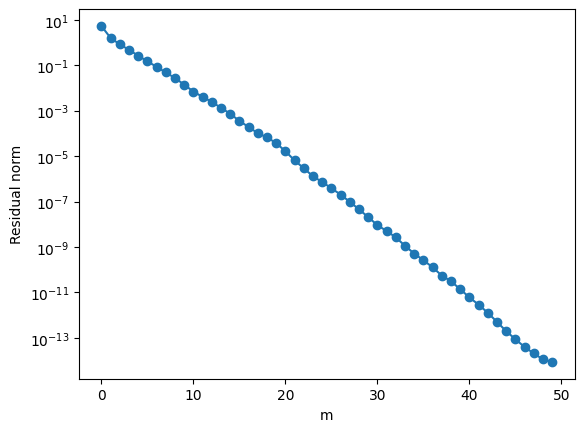

In [8]:
plt.semilogy(np.arange(m), resid, 'o-')
plt.xlabel("m")
plt.ylabel("Residual norm")
plt.show()